# CapStone Project  Car_dekho
### Prepared by Amit Singh

### Importing Modules

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Reading CSV file and viewing data

In [12]:
Car=pd.read_csv('C:/Users/Amit/Desktop/Data Science/Capstone projects/Amit_Singh/Capstone/Car_dekho/data.csv')
car=pd.DataFrame(Car)
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [13]:
car.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


#### Checking null values

In [14]:
car.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

There are null values in Mileage ,engine, max_power ,torque, seats i.e. 5 columns

### Stripping columns to brand name, model and variant

In [15]:
car[['name', 'Model',"Variant"]] =car['name'].str.split(pat=None, n=2, expand=True)
car.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,Model,Variant
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,Swift,Dzire VDI
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,Rapid,1.5 TDI Ambition
2,Honda,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0,City,2017-2020 EXi
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0,i20,Sportz Diesel
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0,Swift,VXI BSIII


In [16]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
car.loc[:,['name']]=car.loc[:,['name']].apply(le.fit_transform)


In [17]:
le.classes_

array(['Ambassador', 'Ashok', 'Audi', 'BMW', 'Chevrolet', 'Daewoo',
       'Datsun', 'Fiat', 'Force', 'Ford', 'Honda', 'Hyundai', 'Isuzu',
       'Jaguar', 'Jeep', 'Kia', 'Land', 'Lexus', 'MG', 'Mahindra',
       'Maruti', 'Mercedes-Benz', 'Mitsubishi', 'Nissan', 'Opel',
       'Peugeot', 'Renault', 'Skoda', 'Tata', 'Toyota', 'Volkswagen',
       'Volvo'], dtype=object)

### Removing Units

In [6]:
car[['Mileage', 'M_Unit']] =car['mileage'].str.split(pat=None, n=2, expand=True)
car.drop('mileage',axis=1,inplace=True)
car.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,engine,max_power,torque,seats,Model,Variant,Mileage,M_Unit
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,First Owner,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,Swift,Dzire VDI,23.4,kmpl
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,Second Owner,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,Rapid,1.5 TDI Ambition,21.14,kmpl
2,Honda,2006,158000,140000,Petrol,Individual,Manual,Third Owner,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0,City,2017-2020 EXi,17.7,kmpl
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,First Owner,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0,i20,Sportz Diesel,23.0,kmpl
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,First Owner,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0,Swift,VXI BSIII,16.1,kmpl


In [7]:
car[['engine_CC']] =car['engine'].replace(to_replace=r'CC$', value='', regex=True)
car[['max_power(bhp)']] =car['max_power'].replace(to_replace=r'bhp$', value='', regex=True)
car.drop(['max_power','engine'],axis=1,inplace=True)
car.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,torque,seats,Model,Variant,Mileage,M_Unit,engine_CC,max_power(bhp)
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,First Owner,190Nm@ 2000rpm,5.0,Swift,Dzire VDI,23.4,kmpl,1248,74
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,Second Owner,250Nm@ 1500-2500rpm,5.0,Rapid,1.5 TDI Ambition,21.14,kmpl,1498,103.52
2,Honda,2006,158000,140000,Petrol,Individual,Manual,Third Owner,"12.7@ 2,700(kgm@ rpm)",5.0,City,2017-2020 EXi,17.7,kmpl,1497,78
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,First Owner,22.4 kgm at 1750-2750rpm,5.0,i20,Sportz Diesel,23.0,kmpl,1396,90
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,First Owner,"11.5@ 4,500(kgm@ rpm)",5.0,Swift,VXI BSIII,16.1,kmpl,1298,88.2


In [8]:
obj_col=['name','fuel','seller_type','transmission','owner']
for i in obj_col:
    count=car[i].value_counts()
    per=car[i].value_counts(normalize=True).round(2)
    per100=car[i].value_counts(normalize=True).mul(100).round(1).astype(str)+ ' %'
    print('\n',i,':','\n')
    new=pd.DataFrame({'counts':count,'per':per,'per100':per100})
    print(new)


 name : 

               counts   per  per100
Maruti           2448  0.30  30.1 %
Hyundai          1415  0.17  17.4 %
Mahindra          772  0.09   9.5 %
Tata              734  0.09   9.0 %
Toyota            488  0.06   6.0 %
Honda             467  0.06   5.7 %
Ford              397  0.05   4.9 %
Chevrolet         230  0.03   2.8 %
Renault           228  0.03   2.8 %
Volkswagen        186  0.02   2.3 %
BMW               120  0.01   1.5 %
Skoda             105  0.01   1.3 %
Nissan             81  0.01   1.0 %
Jaguar             71  0.01   0.9 %
Volvo              67  0.01   0.8 %
Datsun             65  0.01   0.8 %
Mercedes-Benz      54  0.01   0.7 %
Fiat               47  0.01   0.6 %
Audi               40  0.00   0.5 %
Lexus              34  0.00   0.4 %
Jeep               31  0.00   0.4 %
Mitsubishi         14  0.00   0.2 %
Force               6  0.00   0.1 %
Land                6  0.00   0.1 %
Isuzu               5  0.00   0.1 %
Ambassador          4  0.00   0.0 %
Kia              

### Dropping null value columns and converting column data types

In [9]:
car.dropna(inplace= True)# impute means or modes values 
car['Mileage']=car['Mileage'].astype(float)
car['max_power(bhp)']=car['max_power(bhp)'].astype(float)
car['engine_CC']=car['engine_CC'].astype(int)
car.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7906 entries, 0 to 8127
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            7906 non-null   object 
 1   year            7906 non-null   int64  
 2   selling_price   7906 non-null   int64  
 3   km_driven       7906 non-null   int64  
 4   fuel            7906 non-null   object 
 5   seller_type     7906 non-null   object 
 6   transmission    7906 non-null   object 
 7   owner           7906 non-null   object 
 8   torque          7906 non-null   object 
 9   seats           7906 non-null   float64
 10  Model           7906 non-null   object 
 11  Variant         7906 non-null   object 
 12  Mileage         7906 non-null   float64
 13  M_Unit          7906 non-null   object 
 14  engine_CC       7906 non-null   int32  
 15  max_power(bhp)  7906 non-null   float64
dtypes: float64(3), int32(1), int64(3), object(9)
memory usage: 1019.1+ KB


NameError: name 'car' is not defined

In [10]:
car.describe()

,year,selling_price,km_driven,seats,Mileage,engine_CC,max_power(bhp)
count,7906.000000,7.906000e+03,7.906000e+03,7906.000000,7906.000000,7906.000000,7906.000000
mean,2013.983936,6.498137e+05,6.918866e+04,5.416393,19.419861,1458.708829,91.587374
std,3.863695,8.135827e+05,5.679230e+04,0.959208,4.036263,503.893057,35.747216
min,1994.000000,2.999900e+04,1.000000e+00,2.000000,0.000000,624.000000,32.800000
25%,2012.000000,2.700000e+05,3.500000e+04,5.000000,16.780000,1197.000000,68.050000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000,19.300000,1248.000000,82.000000
75%,2017.000000,6.900000e+05,9.542500e+04,5.000000,22.320000,1582.000000,102.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000,42.000000,3604.000000,400.000000


### outliers in numeric columns

C:\Users\Amit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Amit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Amit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Amit\anaconda3\lib\site-p

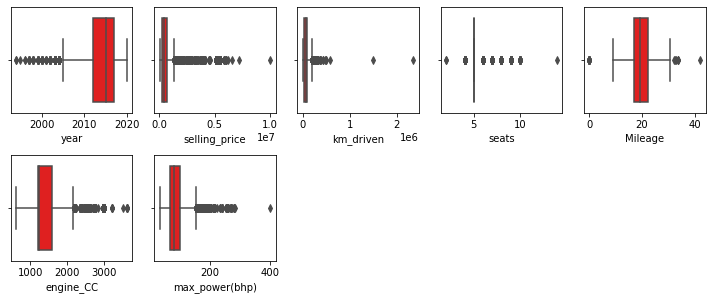

In [11]:
num_column=car.select_dtypes(include = [np.number])
collist=num_column.columns.values
ncol= 5
nrow= 5
plt.figure(figsize= (10,10))
for i in range(0,len(collist)):
    plt.subplot(nrow,ncol,i+1)
    sns.boxplot(num_column[collist[i]],color='red',orient='h')
    plt.tight_layout()

<AxesSubplot:>

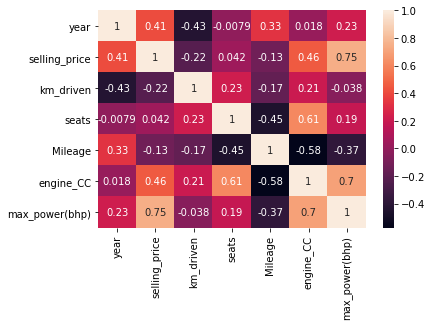

In [12]:
sns.heatmap(car.corr(),annot=True)# annotation

### Countwise Plot of top 20 models

Maruti           2367
Hyundai          1360
Mahindra          758
Tata              719
Honda             466
Toyota            452
Ford              388
Chevrolet         230
Renault           228
Volkswagen        185
BMW               118
Skoda             104
Nissan             81
Jaguar             71
Volvo              67
Datsun             65
Mercedes-Benz      54
Fiat               41
Audi               40
Lexus              34
Jeep               31
Mitsubishi         14
Land                6
Force               6
Isuzu               5
Ambassador          4
Kia                 4
Daewoo              3
MG                  3
Ashok               1
Opel                1
Name: name, dtype: int64


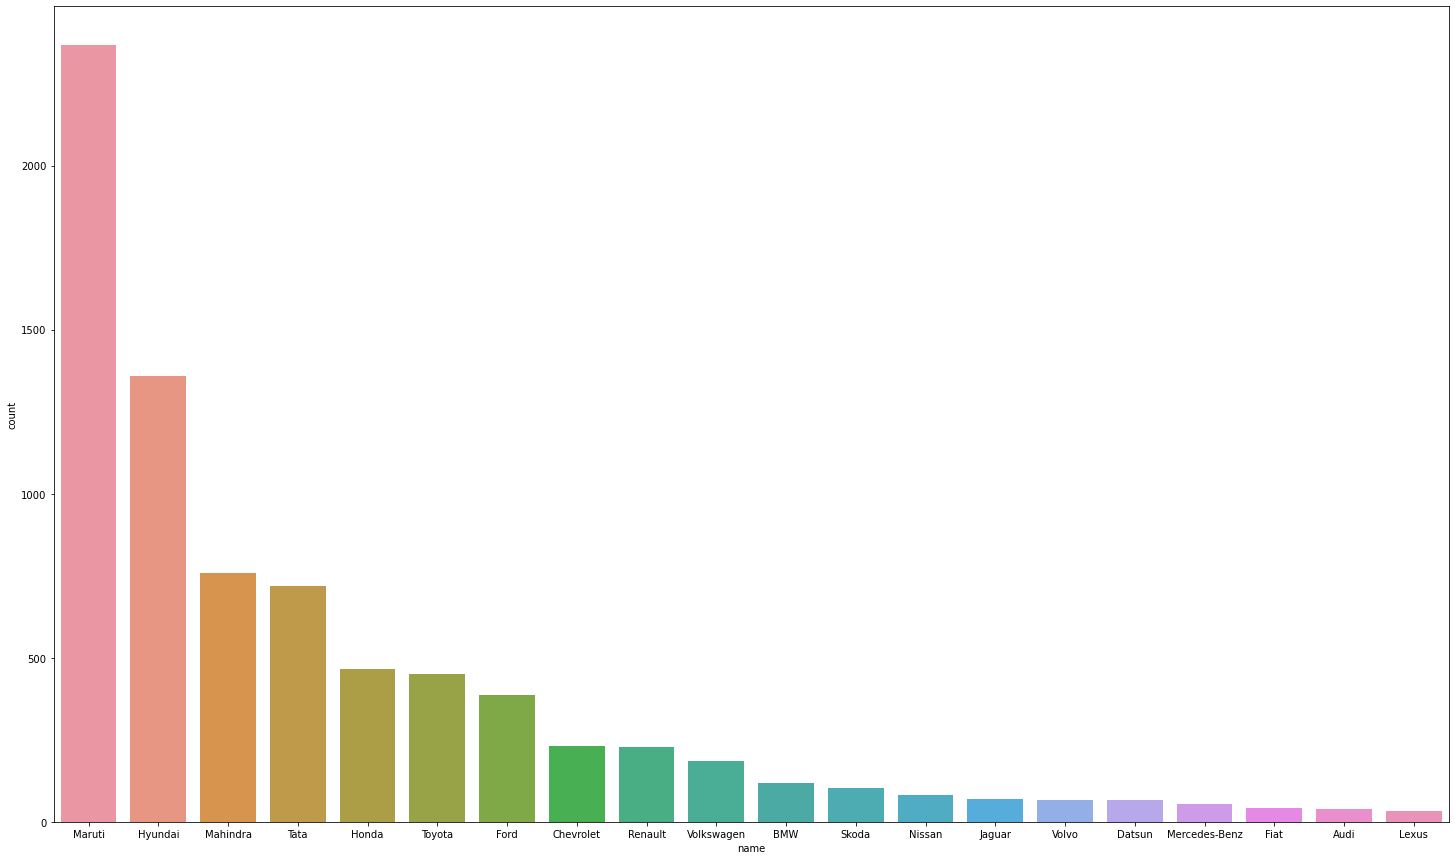

In [13]:
print(car['name'].value_counts())
plt.figure(figsize=(25,15))
ax=sns.countplot(x = 'name',
              data = car,
              order = car['name'].value_counts().head(20).index,orient='v',)

#### Top 5 brands are Maruti,Hyundai, Mahindra ,Tata, Honda

In [14]:
count = car['name'].value_counts()
per = car['name'].value_counts(normalize=True).round(2)
per100 = car['name'].value_counts(normalize=True).mul(100).round(1)
Brandwise=pd.DataFrame({'counts':count,'Per':per,'per100':per100})
Brandwise

,counts,Per,per100
Maruti,2367,0.30,29.9
Hyundai,1360,0.17,17.2
Mahindra,758,0.10,9.6
Tata,719,0.09,9.1
Honda,466,0.06,5.9
Toyota,452,0.06,5.7
Ford,388,0.05,4.9
Chevrolet,230,0.03,2.9
Renault,228,0.03,2.9
Volkswagen,185,0.02,2.3


In [26]:
car['transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

### Costwise Brands

<AxesSubplot:xlabel='name'>

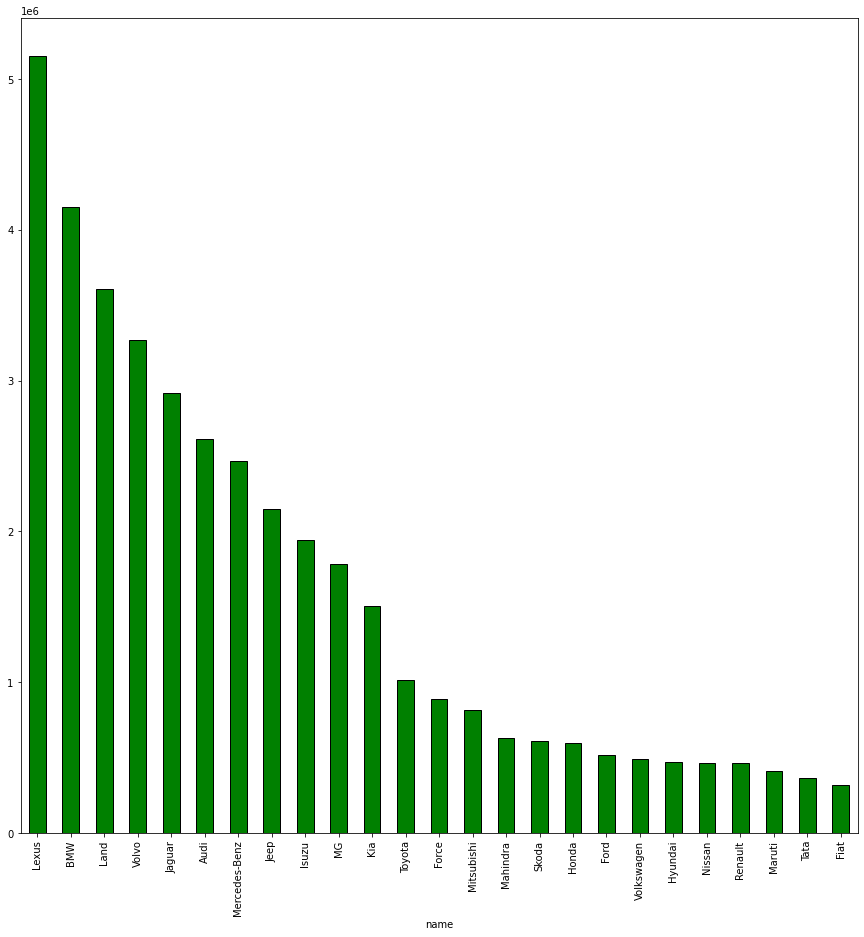

In [15]:
plt.figure(figsize=(15,15))
car.groupby('name').selling_price.mean().nlargest(25).plot(kind='bar',color='green',edgecolor='black')# labels???

#### Lexus,BMW, Landrover are most costliest Brands

#### Relationship between selling price and Km_driven

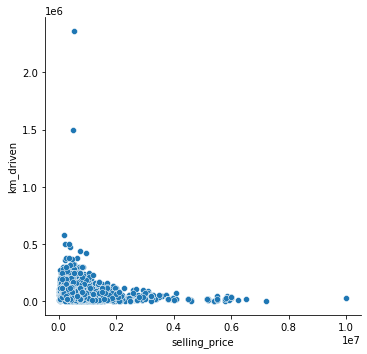

In [16]:
sns.relplot(data=car,x='selling_price',y='km_driven' )

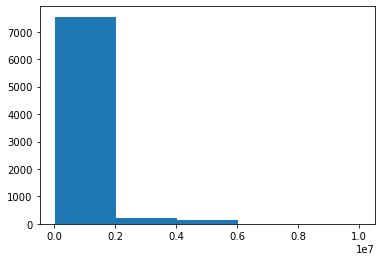

In [17]:
plt.hist(car.selling_price,bins=5)
plt.show()

In [18]:
obj_col=(car.describe(include=object)).columns

<AxesSubplot:xlabel='fuel'>

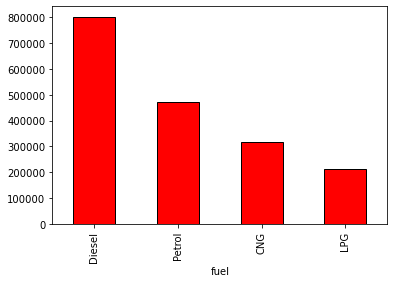

In [19]:
car.groupby('fuel').selling_price.mean().nlargest().plot(kind='bar',color='red',edgecolor='black')

#### Vehicle running on diesels have highest mean selling price while LPG has lowest

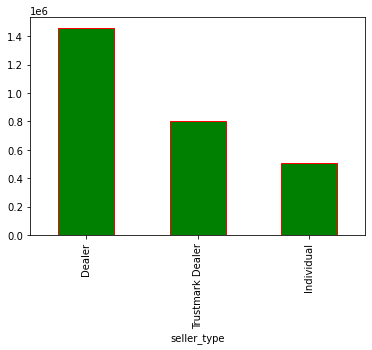

In [20]:
car.groupby('seller_type').selling_price.mean().nlargest().plot(kind='bar',color='green',edgecolor='red')
plt.show()

#### Dealership vehicles have highest mean Selling price while individuals has lowest

In [21]:
col_list=['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'torque', 'seats', 'Model', 'Variant',
       'Mileage', 'engine_CC', 'max_power(bhp)']

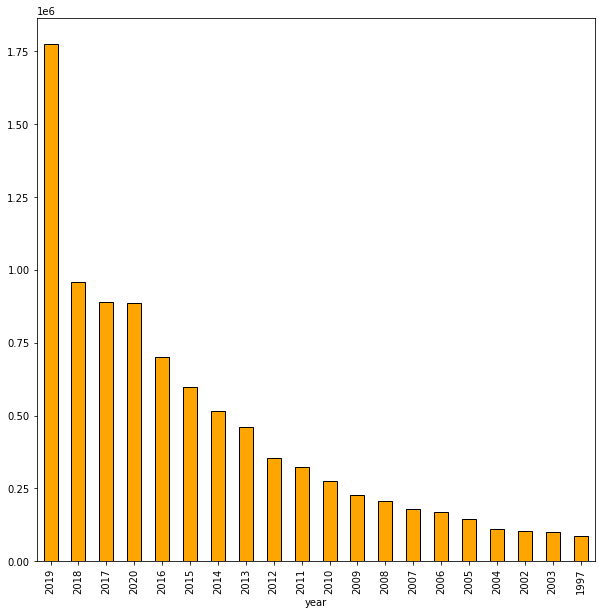

In [22]:
plt.figure(figsize=(10,10))
car.groupby('year').selling_price.mean().nlargest(20).plot(kind='bar',color='orange',edgecolor='black')
plt.show()

#### Mean Selling price of 2019 vehicles are highest

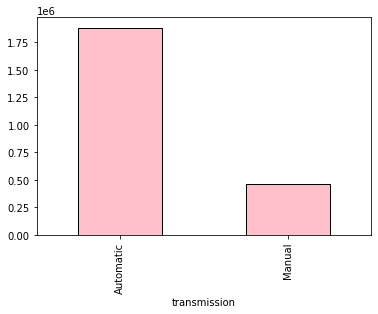

In [23]:
car.groupby('transmission').selling_price.mean().nlargest(10).plot(kind='bar',color='pink',edgecolor='black')
plt.show()

#### Automatic tranmission vehicles have higher mean selling price

<AxesSubplot:xlabel='owner'>

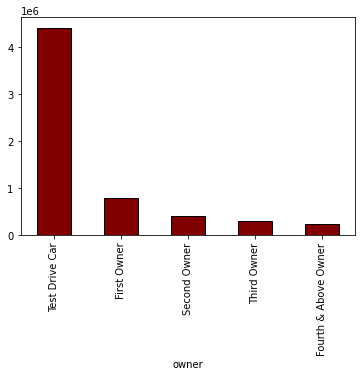

In [24]:
car.groupby('owner').selling_price.mean().nlargest(10).plot(kind='bar',color='maroon',edgecolor='black')

#### Test Driven vehicles have highest mean selling price while prices decreases and no of owners increases

<AxesSubplot:xlabel='torque'>

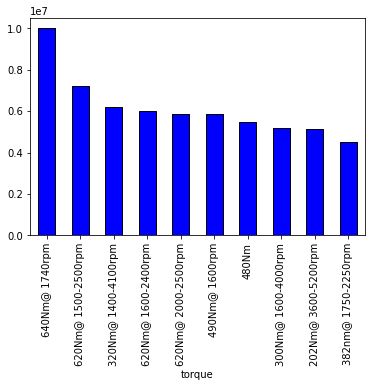

In [25]:
car.groupby('torque').selling_price.mean().nlargest(10).plot(kind='bar',color='blue', edgecolor='black')

<AxesSubplot:xlabel='seats'>

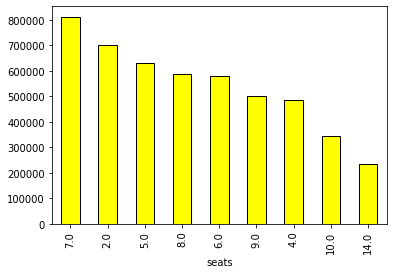

In [26]:
car.groupby('seats').selling_price.mean().nlargest(10).plot(kind='bar',color='yellow', edgecolor='black',)

#### 7 seaters vehicle have highest mean selling price

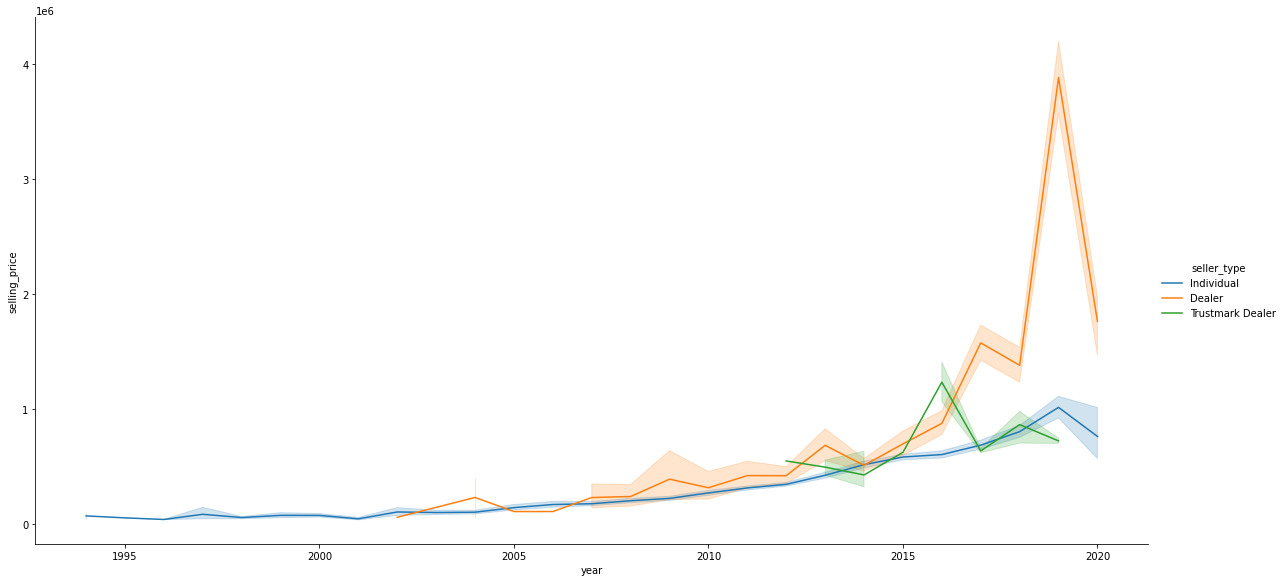

In [27]:
sns.relplot(data=car,
               x='year',
               y='selling_price',
               height=8,
               aspect=2,
               kind='line',
               hue='seller_type'
               )

#### Delaership started in 2002-03 and higher selling price

In [28]:
new=car[car.selling_price >= 6500000]
df=car.drop(new.index)
km=car[car.km_driven >= 780000]
df=df.drop(km.index)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7901 entries, 0 to 8127
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            7901 non-null   object 
 1   year            7901 non-null   int64  
 2   selling_price   7901 non-null   int64  
 3   km_driven       7901 non-null   int64  
 4   fuel            7901 non-null   object 
 5   seller_type     7901 non-null   object 
 6   transmission    7901 non-null   object 
 7   owner           7901 non-null   object 
 8   torque          7901 non-null   object 
 9   seats           7901 non-null   float64
 10  Model           7901 non-null   object 
 11  Variant         7901 non-null   object 
 12  Mileage         7901 non-null   float64
 13  M_Unit          7901 non-null   object 
 14  engine_CC       7901 non-null   int32  
 15  max_power(bhp)  7901 non-null   float64
dtypes: float64(3), int32(1), int64(3), object(9)
memory usage: 1018.5+ KB


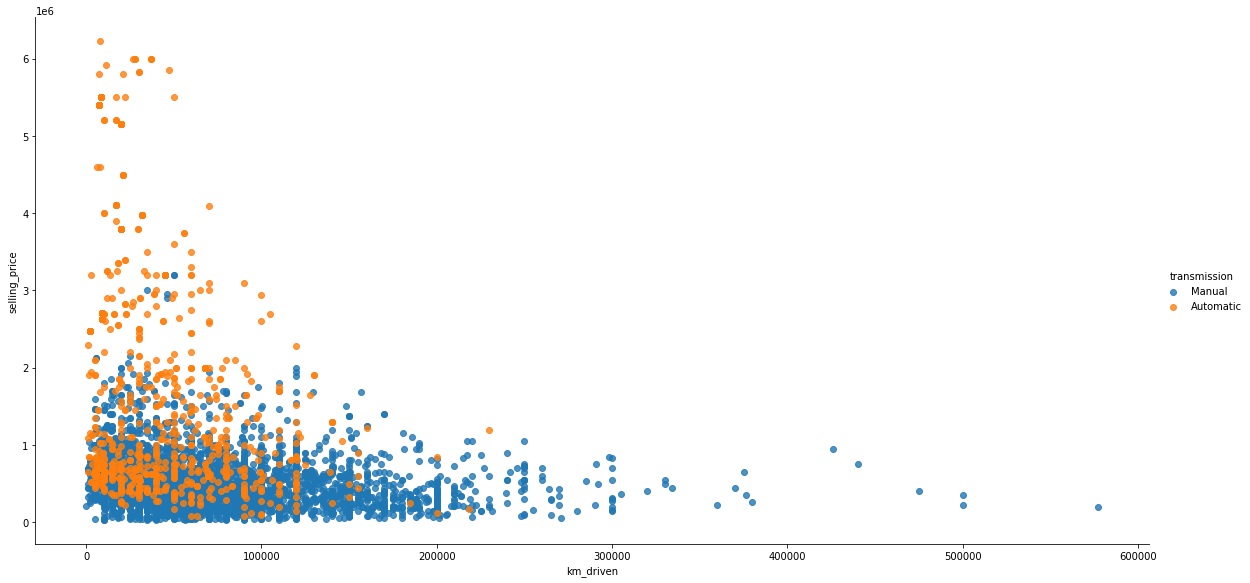

In [29]:
sns.lmplot(data=df,
               x='km_driven',
               y='selling_price',
               height=8,
               aspect=2,
               hue='transmission',
               fit_reg=False
               )

#### Automatic Transmission vehicles have higher Selling price

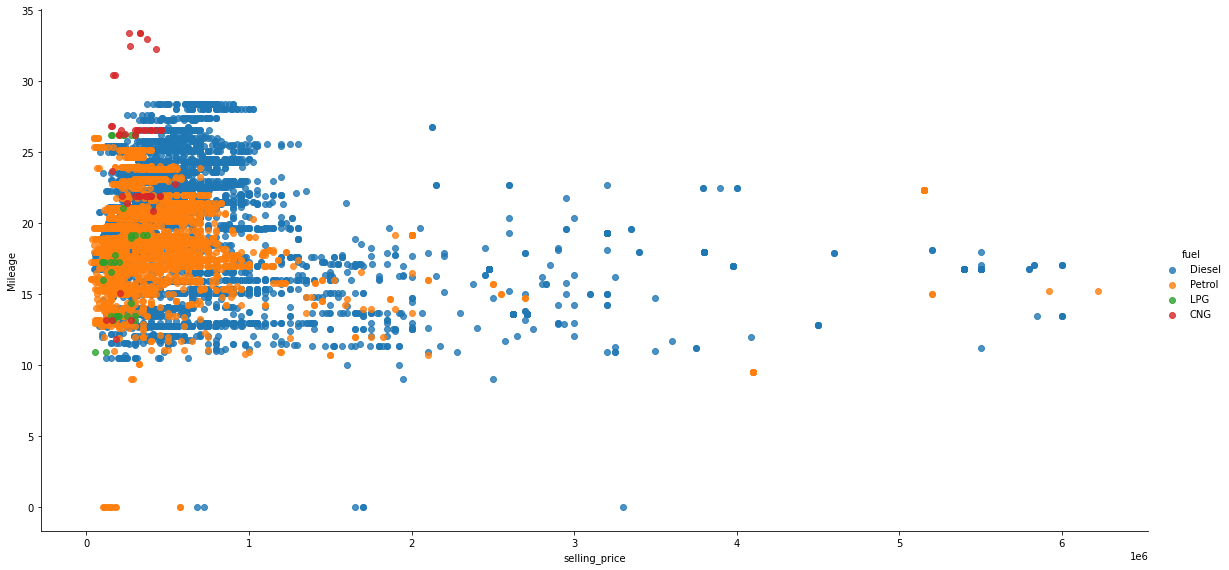

In [30]:
sns.lmplot(data=df,
               y='Mileage',
               x='selling_price',
               height=8,
               aspect=2,
               hue='fuel',
               fit_reg=False
               )

### CNG Vehicles have maximum mileage

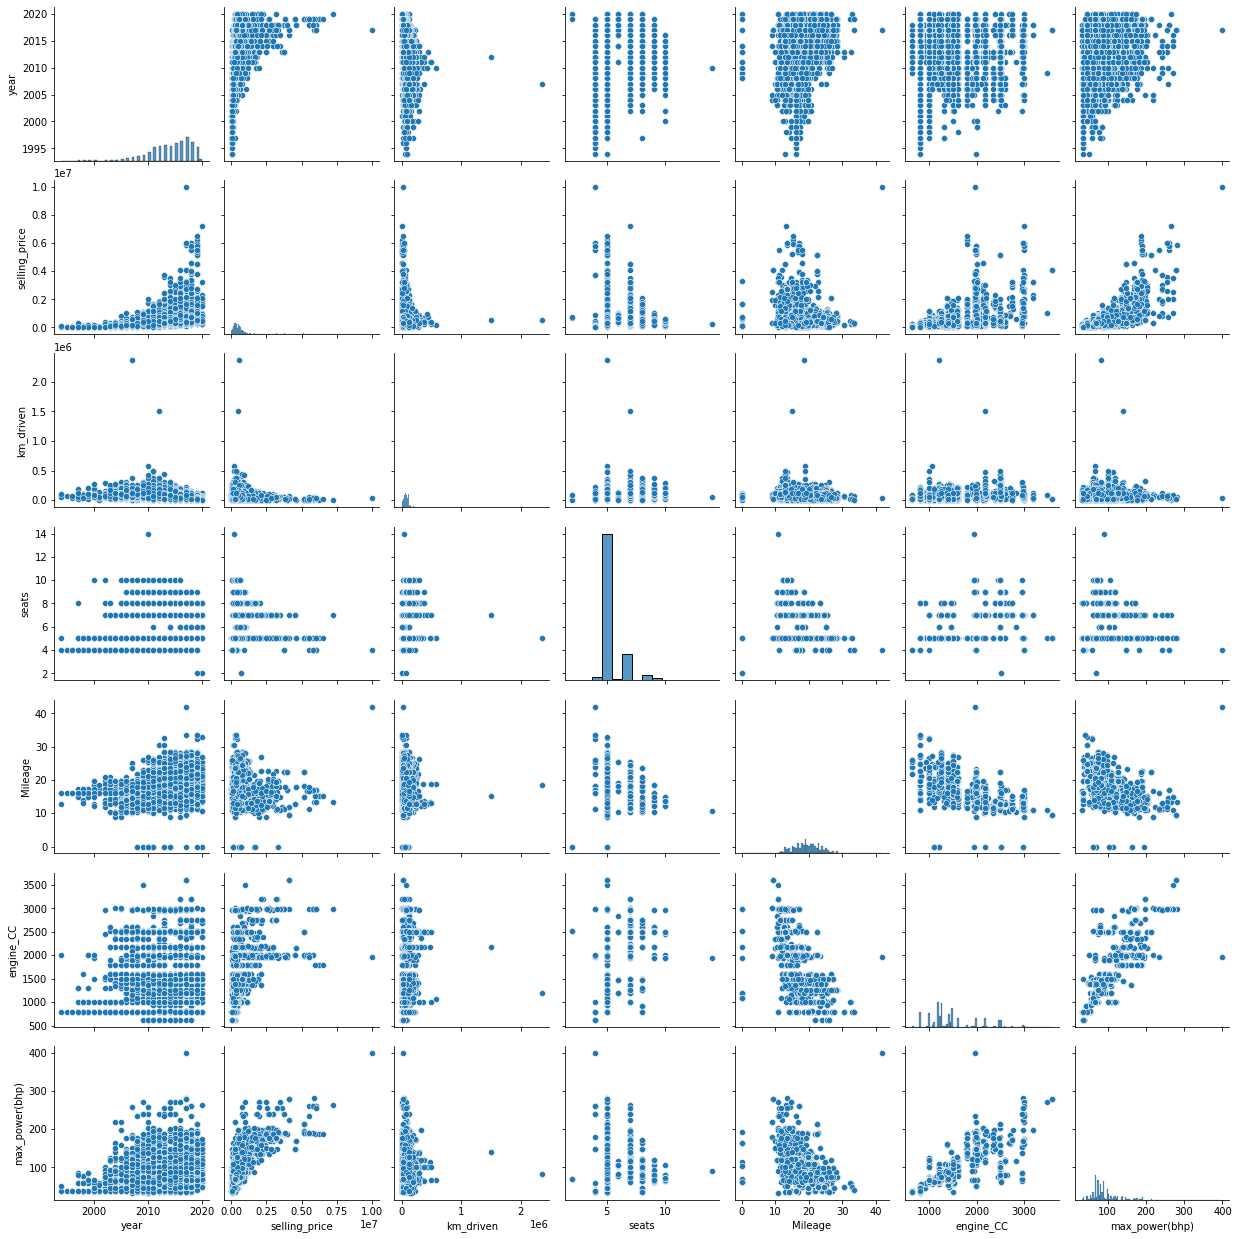

In [31]:
sns.pairplot(data=car)

#### Feature_Engineering

In [20]:
df=car.drop(['M_Unit','Model','Variant','torque'],axis=1)
df.columns
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,seats,Mileage,engine_CC,max_power(bhp)
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,First Owner,5.0,23.40,1248,74.00
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,Second Owner,5.0,21.14,1498,103.52
2,Honda,2006,158000,140000,Petrol,Individual,Manual,Third Owner,5.0,17.70,1497,78.00
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,First Owner,5.0,23.00,1396,90.00
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,First Owner,5.0,16.10,1298,88.20


In [ ]:
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder,OrdinalEncoder
col=['fuel','seller_type','transmission','owner','name',]
ss=MinMaxScaler()
ohe=OneHotEncoder()

In [22]:
oe=OrdinalEncoder(categories=[['First Owner','Second Owner','Third Owner','Fourth & Above Owner','Test Drive Car']])
df['owner']=oe.fit_transform(df[['owner']])


In [ ]:
X=df.drop(df[['selling_price','name']],axis=1)
y=df[['selling_price']]

In [78]:
X['fuel']=ohe.fit_transform(X[['fuel']]).toarray()
X['seller_type']=ohe.fit_transform(X[['seller_type']]).toarray()
X['transmission']=ohe.fit_transform(X[['transmission']]).toarray()

In [82]:
X=ss.fit_transform(X)
X

array([[0.76923077, 0.06164021, 0.        , ..., 0.55714286, 0.20939597,
        0.11220044],
       [0.76923077, 0.05083721, 0.        , ..., 0.50333333, 0.29328859,
        0.19259259],
       [0.46153846, 0.05931015, 0.        , ..., 0.42142857, 0.29295302,
        0.12309368],
       ...,
       [0.57692308, 0.05083721, 0.        , ..., 0.45952381, 0.20939597,
        0.1119281 ],
       [0.73076923, 0.01059075, 0.        , ..., 0.56119048, 0.2590604 ,
        0.10130719],
       [0.73076923, 0.01059075, 0.        , ..., 0.56119048, 0.2590604 ,
        0.10130719]])


### Importing modules for splitting data and metrics required

In [66]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.27)
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error,r2_score,accuracy_score
import warnings
warnings.filterwarnings('ignore')

### Linear Regression

In [83]:
from sklearn.linear_model import LinearRegression
llr=LinearRegression()
llr.fit(X_train,y_train)
llr.score(X_train,y_train)
llr_predict=llr.predict(X_test)
print('Mean Squared Error',round(mean_squared_error(y_test,llr_predict),4))
print('RMSE',round(np.sqrt(mean_squared_error(y_test,llr_predict)),4))
print('R2 Score',round(r2_score(y_test,llr_predict),4))
print('CV score',cross_val_score(llr,X,y,scoring='r2', cv=10).mean())

print('Adjusted R2 Score:',1 - (1-llr.score(X_train,y_train))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))

Mean Squared Error 216764281791.3805
RMSE 465579.5118
R2 Score 0.6904
CV score 0.6596426784113032
Adjusted R2 Score: 0.6720971041346072


### DecisionTreeRegressor

In [84]:
from sklearn.tree import DecisionTreeRegressor
dtr= DecisionTreeRegressor()

dtr.fit(X_train,y_train)
predict=dtr.predict(X_test)
print('Mean Squared Error',round(mean_squared_error(y_test,predict),4))
print('RMSE',round(np.sqrt(mean_squared_error(y_test,predict)),4))
print('R2 Score',round(r2_score(y_test,predict),4))
print('CV score',cross_val_score(dtr,X,y,scoring='r2', cv=10).mean())


Mean Squared Error 19292476712.6273
RMSE 138897.3604
R2 Score 0.9724
CV score 0.9443893005995712


### Random Forest Regressor

In [85]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(X_train,y_train)
rf.score(X_train,y_train)
rf_predict=rf.predict(X_test)
print('Mean Squared Error',round(mean_squared_error(y_test,rf_predict),4))
print('RMSE',round(np.sqrt(mean_squared_error(y_test,rf_predict)),4))
print('R2 Score',round(r2_score(y_test,rf_predict),4))
print('CV score',cross_val_score(rf,X,y,scoring='r2', cv=10).mean())
print('Adjusted R2 Score:',1 - (1-rf.score(X_train,y_train)*rf.score(X_train,y_train))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))

Mean Squared Error 14679735687.1581
RMSE 121159.9591
R2 Score 0.979
CV score 0.9652048811965305
Adjusted R2 Score: 0.9885556217348894


 ### GradientBoostingRegressor

In [42]:
from sklearn.ensemble import GradientBoostingRegressor
gb=GradientBoostingRegressor(alpha=0.06)
gb.fit(X_train,y_train)
gb.score(X_train,y_train)
gb_predict=gb.predict(X_test)
print('Mean Squared Error',round(mean_squared_error(y_test,gb_predict),4))
print('RMSE',round(np.sqrt(mean_squared_error(y_test,gb_predict)),4))
print('R2 Score',round(r2_score(y_test,gb_predict),4))
print('CV score',cross_val_score(gb,X,y,scoring='r2', cv=10).mean())

Mean Squared Error 23665138097.4273
RMSE 153834.7753
R2 Score 0.9662
CV score 0.95220711547815


### Random Forest Regressor hyper parameters tuning

In [87]:
from sklearn.model_selection import GridSearchCV
parameters={
    'criterion' : ["mse", "mae"],
    
    'max_depth': [0,1,10,100],  
    'n_estimators':[1,100,]
           }
rfgsv=GridSearchCV(rf,parameters,cv=5)
rfgsv.fit(X,y)
rfgsv.best_params_


KeyboardInterrupt: 

In [86]:
from sklearn.ensemble import RandomForestRegressor
nrf=RandomForestRegressor(criterion ='mse', max_depth= 100, n_estimators= 100)
nrf.fit(X_train,y_train)
nrf.score(X_train,y_train)
nrf_predict=nrf.predict(X_test)
print('Mean Squared Error',round(mean_squared_error(y_test,nrf_predict),4))
print('RMSE',round(np.sqrt(mean_squared_error(y_test,nrf_predict)),4))
print('R2 Score',round(r2_score(y_test,rf_predict),4))
print('CV score',cross_val_score(nrf,X,y,scoring='r2', cv=10).mean())
print('Adjusted R2 Score:',1 - (1-nrf.score(X_train,y_train)*nrf.score(X_train,y_train))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))

Mean Squared Error 14242456643.4172
RMSE 119341.764
R2 Score 0.979
CV score 0.9649683004791955
Adjusted R2 Score: 0.9889061388840045


### DecisionTree Regressor hyper parameters tuning

In [ ]:
from sklearn.model_selection import GridSearchCV
parameters={
    'criterion' : ["mse", "friedman_mse", "mae"],
    'splitter': ["best", "random"],
    'max_depth': [0,1,5,10,100],          
           }
gsv=GridSearchCV(dtr,parameters,cv=5)


In [ ]:
gsv.fit(X,y)

In [ ]:
gsv.best_params_

In [ ]:
from sklearn.tree import DecisionTreeRegressor
ndtr= DecisionTreeRegressor(criterion= 'friedman_mse',max_depth=100, splitter= 'best')
ndtr.fit(X_train,y_train)
predict=ndtr.predict(X_test)
print('Mean Squared Error',round(mean_squared_error(y_test,predict),4))
print('RMSE',round(np.sqrt(mean_squared_error(y_test,predict)),4))
print('R2 Score',round(r2_score(y_test,predict),4))
print('CV score',cross_val_score(ndtr,X,y,scoring='r2', cv=10).mean())


### Importing RandomForest Regressor as R2 Score is maximun and RMSE is also lowest

In [32]:
import joblib
joblib.dump(nrf,'model.pkl')

['model.pkl']

In [36]:
model=joblib.load('model.pkl')

In [39]:
print(model.predict([[0.0,2017,0.061640,0,0,0,2,4,30,0.209,0.11200]]))

[584984.97]


In [40]:
X.columns

Index(['name', 'year', 'km_driven', 'fuel', 'seller_type', 'transmission',
       'owner', 'seats', 'Mileage', 'engine_CC', 'max_power(bhp)'],
      dtype='object')

In [45]:
import pickle

In [46]:
pickle.dump(nrf,open('model.pkl','wb'))

In [48]:
model=pickle.load(open('model.pkl','rb'))

In [53]:
print((model.predict([[0.0,2014,0.061640,0,1,0,0,4,23.40,0.203,0.112]])))

[436660.71333333]


In [49]:
X

,name,year,km_driven,fuel,seller_type,transmission,owner,seats,Mileage,engine_CC,max_power(bhp)
0,0.0,2014,0.061640,0.0,0.0,0.0,0.0,5.0,23.40,0.209396,0.112200
1,0.0,2014,0.050837,0.0,0.0,0.0,1.0,5.0,21.14,0.293289,0.192593
2,0.0,2006,0.059310,0.0,0.0,0.0,2.0,5.0,17.70,0.292953,0.123094
3,0.0,2010,0.053803,0.0,0.0,0.0,0.0,5.0,23.00,0.259060,0.155773
4,0.0,2007,0.050837,0.0,0.0,0.0,0.0,5.0,16.10,0.226174,0.150871
...,...,...,...,...,...,...,...,...,...,...,...
8123,0.0,2013,0.046601,0.0,0.0,0.0,0.0,5.0,18.50,0.192282,0.136302
8124,0.0,2007,0.050414,0.0,0.0,0.0,3.0,5.0,16.80,0.291611,0.210240
8125,0.0,2009,0.050837,0.0,0.0,0.0,0.0,5.0,19.30,0.209396,0.111928
8126,0.0,2013,0.010591,0.0,0.0,0.0,0.0,5.0,23.57,0.259060,0.101307


In [57]:
df['fuel'].unique()

array(['Diesel', 'Petrol', 'LPG', 'CNG'], dtype=object)

In [58]:
X.columns

Index(['name', 'year', 'km_driven', 'fuel', 'seller_type', 'transmission',
       'owner', 'seats', 'Mileage', 'engine_CC', 'max_power(bhp)'],
      dtype='object')

In [122]:
i=ohe.fit(df[['name']])
tr_filename='ohe_name.pkl'
pickle.dump(df['name'],open('ohe_name.pkl','wb'))

KeyError: "None of [Index(['name'], dtype='object')] are in the [columns]"

In [89]:
name_obj=pickle.load(open('ohe_name.pkl', 'rb'))

In [3]:
import joblib
model=joblib.load('car_msp.ml')

In [5]:
model.predict([[0,1,2,3,4,5,6,7,8,9]])

array([358455.])